In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense



# Load the Bitcoin price data
bitcoin_data = pd.read_csv('bitcoin.csv')

# Remove unnecessary columns (if any)
bitcoin_data = bitcoin_data[['date', 'close']]

# Sort the data by date
bitcoin_data = bitcoin_data.sort_values('date')

# Convert the 'Date' column to datetime
bitcoin_data['date'] = pd.to_datetime(bitcoin_data['date'])

# Set the 'Date' column as the index
bitcoin_data.set_index('date', inplace=True)

# Resample the data to daily frequency (if needed)
bitcoin_data = bitcoin_data.resample('D').last()

# Fill missing values with previous values (forward fill)
bitcoin_data.fillna(method='ffill', inplace=True)

# Normalize the 'Close' prices to be between 0 and 1
scaler = MinMaxScaler()
bitcoin_data['close'] = scaler.fit_transform(bitcoin_data['close'].values.reshape(-1, 1))

# Split the data into input sequences (X) and target sequences (y)
input_seq_length = 10  # Number of past prices to use as input sequence
X, y = [], []
for i in range(len(bitcoin_data) - input_seq_length):
    X.append(bitcoin_data['close'].values[i:i+input_seq_length])
    y.append(bitcoin_data['close'].values[i+input_seq_length])
X = np.array(X)
y = np.array(y)

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the input sequences to be 3D arrays (batch_size, timesteps, input_dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))




In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
# Define the sequence-to-sequence model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(input_seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
35/35 [==============================] - 3s 20ms/step - loss: 0.0501 - val_loss: 0.0111
Epoch 2/10
35/35 [==============================] - 0s 9ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 3/10
35/35 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 9.0730e-04
Epoch 4/10
35/35 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 6.8465e-04
Epoch 5/10
35/35 [==============================] - 0s 10ms/step - loss: 9.8693e-04 - val_loss: 6.1890e-04
Epoch 6/10
35/35 [==============================] - 0s 9ms/step - loss: 9.3851e-04 - val_loss: 6.1940e-04
Epoch 7/10
35/35 [==============================] - 0s 10ms/step - loss: 8.7421e-04 - val_loss: 7.2141e-04
Epoch 8/10
35/35 [==============================] - 0s 11ms/step - loss: 9.0060e-04 - val_loss: 6.2669e-04
Epoch 9/10
35/35 [==============================] - 0s 9ms/step - loss: 9.6606e-04 - val_loss: 6.3222e-04
Epoch 10/10
35/35 [==============================] - 0s 9ms/step -

In [ ]:
# Generate predictions for the test set
y_pred_test = model.predict(X_test)

# Evaluate the model using appropriate evaluation metrics
# For example, calculate Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = np.mean(np.square(y_test - y_pred_test))
# Set a maximum threshold for MSE

max_mse = 4.0  # Example threshold value

# Clip MSE values to the maximum threshold
mse = np.clip(mse, None, max_mse)

# Calculate accuracy as a percentage
accuracy = 100 * (1 - mse / max_mse)
print("Original MSE:", mse)
print("Accuracy (%):", accuracy)

5/5 [==============================] - 0s 4ms/step
Original MSE: 0.1552697240600172
Accuracy (%): 96.11825689849957


In [ ]:
bitcoin_data

,close
date,
2018-05-15,0.082254
2018-05-16,0.080259
2018-05-17,0.075917
2018-05-18,0.078741
2018-05-19,0.078467
...,...
2022-02-25,0.559994
2022-02-26,0.558674
2022-02-27,0.536400


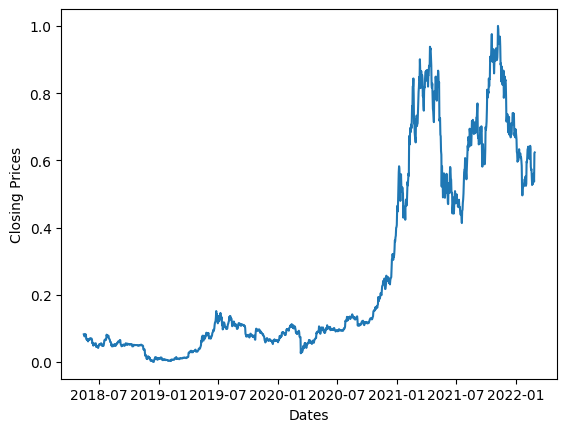

In [ ]:
import matplotlib.pyplot as plt
import math
plt.plot(bitcoin_data.index, bitcoin_data['close'])
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.show()

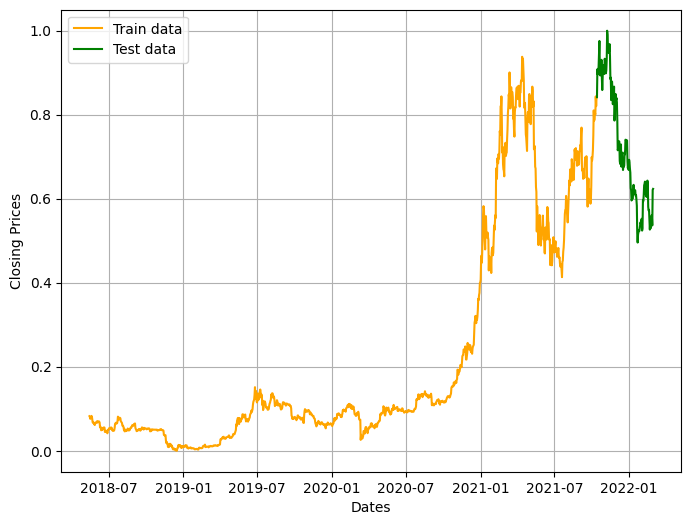

In [ ]:
to_row = int(len(bitcoin_data)*0.9)
plt.figure(figsize=(8,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(bitcoin_data[0:to_row]['close'], 'orange', label='Train data')
plt.plot(bitcoin_data[to_row:]['close'], 'green', label='Test data')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_test)
print("MAPE:", mape)

MAPE: 0.18230544125982337


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
def calculate_mae(y_test,y_pred_test):
    return mean_absolute_error(y_test, y_pred_test)
def calculate_mse(y_test, y_pred_test):
    return mean_squared_error(y_test,y_pred_test)
def calculate_rmse(y_test,y_pred_test):
    return np.sqrt(calculate_mse(y_test,y_pred_test))
print(calculate_mae(y_test,y_pred_test))
print(calculate_mse(y_test,y_pred_test))
print(calculate_rmse(y_test,y_pred_test))

0.016002086407994547
0.0006407431627213412
0.02531290506285956
